In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples,silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns
import math
import random
import copy

## Get Data

In [2]:
df_kend_train = pd.read_csv('./../dataset/kendaraan_train_clean.csv')
print("Total Data", len(df_kend_train))
df_kend_train.head()

Total Data 230625


,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan
0,1.000000,0.153846,1.0,0.634615,1.0,0.5,1.000000,0.409000,0.932099,0.301038
1,0.000000,0.430769,1.0,0.750000,0.0,1.0,0.000000,0.367431,0.172840,0.512111
2,0.459542,0.015385,1.0,0.884615,1.0,0.5,1.000000,0.496727,0.981481,0.377163
3,0.000000,0.461538,1.0,0.673077,0.0,1.0,0.495196,0.536338,0.537037,0.636678
4,0.000000,0.015385,1.0,0.673077,1.0,0.5,1.000000,0.310270,0.932099,0.557093


## Select Attribute for Clustering

Text(0.5, 1.0, 'Korelasi Tiap Atribut')

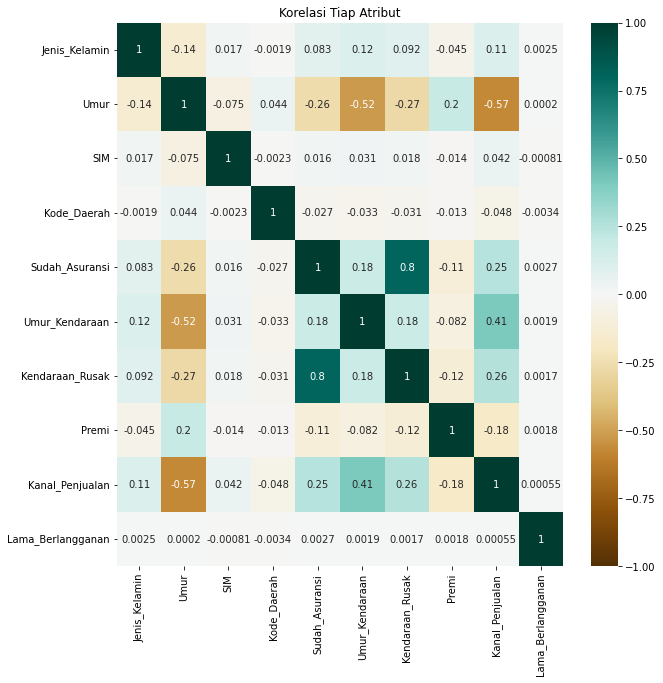

In [3]:
corr = df_kend_train.corr()
plt.figure(figsize=(10, 10))
heatmap = sns.heatmap(corr, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Korelasi Tiap Atribut')

In [4]:
# x = 'Umur'
# y = 'Kanal_Penjualan'
x = 'Umur'
y = 'Premi'
df_kend_train =df_kend_train[[x, y]]
df = copy.deepcopy(df_kend_train)
df['Cluster'] = ""
df['Color'] = ""
df.head()

,Umur,Premi,Cluster,Color
0,0.153846,0.409000,,
1,0.430769,0.367431,,
2,0.015385,0.496727,,
3,0.461538,0.536338,,
4,0.015385,0.310270,,


## Kmeans Function

### Initiate Centroid with Random Value

In [5]:
def initialCentroid(k, x, y, df):  
  randValue = {}
  for i in range(k):
    randValue[i] = [df[x][random.randint(0, len(df))], df[y][random.randint(0, len(df))]]
  print("rand: ", randValue)
  return randValue

### Calculate Distance Using Euclidean

In [6]:
def calcEuclidean(a, b):
  return math.sqrt((a[0]-b[0])**2 + (a[1] - b[1])**2)

def calcDist(df, centroids):
  colors = ['blue','orange','brown','red','olive','green','pink','grey','purple','cyan','gray']  
  dftmp = df.copy()  
  clus = []
  color = []
  for data in df.index:    
    dist = []
    rowData = [df[x][data], df[y][data]]
    for centroid in centroids:
      dist.append(calcEuclidean(rowData, centroids[centroid]))            
    clusIdx = dist.index(min(dist))
    clus.append(clusIdx)
    color.append(colors[clusIdx])    
  dftmp['Cluster'] = clus
  dftmp['Color'] = color
  return dftmp

### Set New Centroid

In [7]:
def setCentroid(centroids, x, y, df):
  for i in centroids.keys():    
    centroids[i][0] = np.mean(df.loc[df['Cluster']==i, x])
    centroids[i][1] = np.mean(df.loc[df['Cluster']==i, y])
  return centroids

### Main Function KMeans

In [8]:
def kMeans(k, x, y, df):      
  centroid = initialCentroid(k, x, y, df)  
  same = False
  i = 0    
  while(same == False):    
    old_centroid = copy.deepcopy(centroid)    
    df = calcDist(df, centroid)    
    centroid = setCentroid(centroid, x, y, df)            
    print('iterasi ke-', i)
    print('Centroid Sekarang:')
    for key in centroid.keys():
      print(key, ': ', centroid.get(key))
    if (old_centroid == centroid):
      print('amsu')
      same = True    
    i+=1
  print('Perulangan ke', i-1)
  print('Hasil Akhir Centroid:')
  for key in centroid.keys():
    print(key, ': ', centroid.get(key))      
  return centroid, df

## Make Cluster Visualisation Function

In [9]:
def visualisasi_cluster(df, x, y, centroid):
  plt.figure(figsize=(6,6))
  plt.title('Visualisasi Hasil Clustering')
  plt.scatter(df[x], df[y], color=df['Color'], alpha=0.5)
  for i in range(k):
    plt.scatter(centroid[i][0], centroid[i][1], color='k', marker='p',s=200)

  plt.xlabel(x)
  plt.ylabel(y)
  plt.show()

## Proses Clustering with 2 total cluster

In [10]:
k = 2
centroid, df_hasil = kMeans(k, x, y, df)
df_hasil

rand:  {0: [0.0923076923076923, 0.4765670166539229], 1: [0.0461538461538461, 0.4822177878070159]}
iterasi ke- 0
Centroid Sekarang:
0 :  [0.36108722265859405, 0.5279487824773343]
1 :  [0.04096215022188707, 0.5368888379299768]
iterasi ke- 1
Centroid Sekarang:
0 :  [0.45458294800115606, 0.5544806218119178]
1 :  [0.0728352663194137, 0.501284010647274]
iterasi ke- 2
Centroid Sekarang:
0 :  [0.47813276617880535, 0.567272746617003]
1 :  [0.09051908332076658, 0.49461888152936234]
iterasi ke- 3
Centroid Sekarang:
0 :  [0.49528347986618426, 0.5779995889031198]
1 :  [0.10500091761376545, 0.4912038542015578]
iterasi ke- 4
Centroid Sekarang:
0 :  [0.5067323996796893, 0.5831891892111207]
1 :  [0.1135120530695121, 0.49114823084729964]
iterasi ke- 5
Centroid Sekarang:
0 :  [0.5138080990588599, 0.5856438736770228]
1 :  [0.1184221311419936, 0.49174362337166205]
iterasi ke- 6
Centroid Sekarang:
0 :  [0.5178207846992132, 0.5867066196476559]
1 :  [0.12106395758316074, 0.49229738911068516]
iterasi ke- 7
Cen

,Umur,Premi,Cluster,Color
0,0.153846,0.409000,1,orange
1,0.430769,0.367431,0,blue
2,0.015385,0.496727,1,orange
3,0.461538,0.536338,0,blue
4,0.015385,0.310270,1,orange
...,...,...,...,...
230620,0.046154,0.370937,1,orange
230621,0.015385,0.719643,1,orange
230622,0.046154,0.814103,1,orange
230623,0.738462,0.455139,0,blue


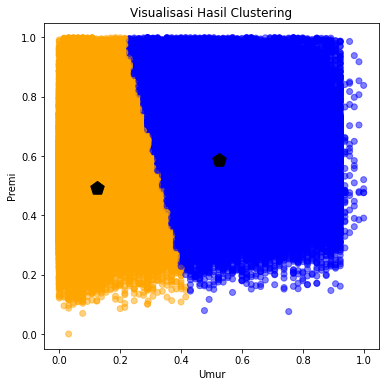

In [11]:
visualisasi_cluster(df_hasil, x, y, centroid)

## Evaluasi Model

### Elbow Method

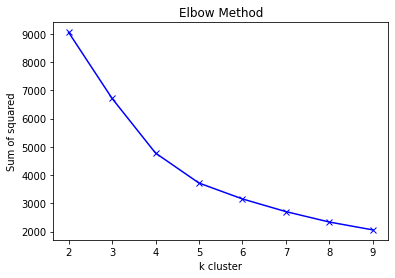

In [12]:
wcss = []
K = range(2, 10)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(df_kend_train)
    wcss.append(km.inertia_)

plt.plot(K, wcss, 'bx-')
plt.xlabel('k cluster')
plt.ylabel('Sum of squared')
plt.title('Elbow Method')
plt.show()

### Silhouette Analysis

In [16]:
n_clusters = [2,3,4]
for i,k in enumerate(n_clusters):        
  km = KMeans(n_clusters=k)
  predict = km.fit_predict(df_kend_train)
  score = silhouette_score(df_kend_train, predict, metric="euclidean")
  print("For ", k, "n_clusters silhouette score is ", score)

For  2 n_clusters silhouette score is  0.45151707848065664
For  3 n_clusters silhouette score is  0.396018852157771
For  4 n_clusters silhouette score is  0.41890280165175536


## Eksperimen

### Test Jumlah Cluster Berdasarkan Evaluasi

rand:  {0: [0.123076923076923, 0.3273717386844706], 1: [0.3692307692307692, 0.9965871580164488], 2: [0.6000000000000001, 0.3894929225490013]}
iterasi ke- 0
Centroid Sekarang:
0 :  [0.12739576663525937, 0.46569150352587974]
1 :  [0.336816890894963, 0.8014948676803115]
2 :  [0.5530155730960291, 0.5128985840806928]
iterasi ke- 1
Centroid Sekarang:
0 :  [0.12211874590819297, 0.46363865907734464]
1 :  [0.31684746236867123, 0.7763892181317684]
2 :  [0.5628373954334374, 0.5173874389566406]
iterasi ke- 2
Centroid Sekarang:
0 :  [0.12153762586830172, 0.4587207957586645]
1 :  [0.29949042698988687, 0.7603862683931842]
2 :  [0.5693878509390856, 0.5218405200902944]
iterasi ke- 3
Centroid Sekarang:
0 :  [0.12198574209789531, 0.4540291848702543]
1 :  [0.2842188862921535, 0.7493472512176463]
2 :  [0.5739078658653771, 0.5268169229036994]
iterasi ke- 4
Centroid Sekarang:
0 :  [0.12266879400940621, 0.44997624969306743]
1 :  [0.2714314739894379, 0.7415929271591427]
2 :  [0.5763189394108806, 0.531541710578

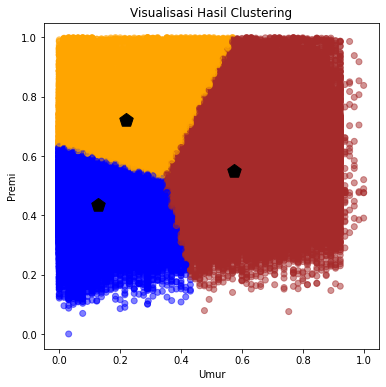

In [14]:
k = 3
centroid, df_hasil = kMeans(k, x, y, df)
visualisasi_cluster(df_hasil, x, y, centroid)